In [1]:
# -*- coding:utf-8 -*- #

### 9.1.1 K近鄰算法

In [2]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()
X = data.data # 自變量
y = data.target # 因變量
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
clf = neighbors.KNeighborsClassifier(5) # 設鄰居數爲5個
clf.fit(x_train, y_train) # 訓練模型
print(clf.score(x_test, y_test)) # 給模型打分
print(clf.predict([x_test[0]]), y_test[0], clf.predict_proba([x_test[0]]))

0.8947368421052632
[0] 0 [[0.6 0.4]]


In [3]:
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import numpy as np
import operator

def classify(inX, dataSet, labels, k):
    #S=np.cov(dataSet.T)   #協方差矩陣，爲計算馬氏距離
    #SI = np.linalg.inv(S)  #協方差矩陣的逆矩陣
    #distances = np.array(distance.cdist(dataSet, [inX], 'mahalanobis', VI=SI)).reshape(-1)
    distances = np.array(distance.cdist(dataSet, [inX], 'euclidean').reshape(-1))
    sortedDistIndicies = distances.argsort() # 取排序的索引，用於label排序
    classCount={}
    for i in range(k): # 訪問距離最近的五個實例
        voteILabel = labels[sortedDistIndicies[i]]
        classCount[voteILabel]=classCount.get(voteILabel,0)+1
    sortedClassCount = sorted(classCount.items(), 
             key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0] # 取最多的分類

ret = [classify(x_test[i], x_train, y_train, 5) for i in range(len(x_test))]
print(accuracy_score(y_test, ret))

0.8947368421052632


### 9.1.2 聚類算法

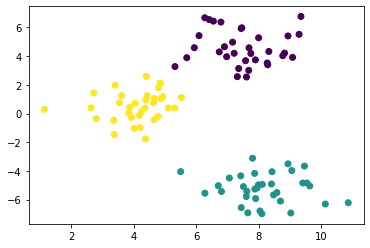

In [4]:
from sklearn.datasets import make_blobs  # 數據支持
from sklearn.cluster import KMeans  # 聚類方法
import matplotlib.pyplot as plt  # 繪圖工具
%matplotlib inline

X,y = make_blobs(n_samples=100, random_state=150) 
y_pred = KMeans(n_clusters=3, random_state=5).fit_predict(X)  # 訓練
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()